# Dow Jones - Historic Data Analysis

In this Notebook we will have a quick look at the historic Dow Jones data-set and perform some basic pre-processing.


## Data Load

In the first step, let's load the data and have a look.

In [2]:
# Import libs...
import pandas as pd
import seaborn as sns
# ... and set variables
DATA_PATH = './data/preprocessed/'
FILE_NAME = 'dow_historic_2000_2020.csv'

In [3]:
# Read dataframe and show last couple of rows...
df = pd.read_csv(DATA_PATH + FILE_NAME)
df.tail()

,stock,date,open,high,low,close,adj_close,volume,dividend,split
150498,WMT,2020-12-24,143.54,144.39,143.18,143.50,142.34,3018157,0.0,1.0
150499,WMT,2020-12-28,144.04,145.30,143.33,145.22,144.05,6383951,0.0,1.0
150500,WMT,2020-12-29,145.64,145.84,143.59,144.30,143.13,5979380,0.0,1.0
150501,WMT,2020-12-30,144.88,145.15,143.94,144.18,143.01,6250385,0.0,1.0
150502,WMT,2020-12-31,144.20,144.27,142.85,144.15,142.99,5938018,0.0,1.0


## Pre-Processing

Now, let's enginere some features.

In [35]:
# Engineer some basic features
# Convert date to datetime format
df.date = pd.to_datetime(df.date)
# Add year
df['year'] = df.date.dt.year
# Add month
df['month'] = df.date.dt.month_name().str[0:3]
# Add weekday
df['day_of_week'] = df.date.dt.day_name()
# Calculate the stock movement on a given day
df['pct_change_day'] = round((df.close / df.open - 1) * 100, 2)
# Create a categorical label out of the stock movements per day (in this case: label = 1 if movement >= 2%)
df['label'] = df['pct_change_day'] >= 2

False    139468
True      11035
Name: label, dtype: int64

In [31]:
df.head()

,stock,date,open,high,low,close,adj_close,volume,dividend,split,year,month,day_of_week,pct_change_day,label
0,AAPL,2000-01-03,104.87,112.50,101.69,111.94,0.86,4783900,0.0,1.0,2000,Jan,Monday,6.74,True
1,AAPL,2000-01-04,108.25,110.62,101.19,102.50,0.79,4574800,0.0,1.0,2000,Jan,Tuesday,-5.31,False
2,AAPL,2000-01-05,103.75,110.56,103.00,104.00,0.80,6949300,0.0,1.0,2000,Jan,Wednesday,0.24,False
3,AAPL,2000-01-06,106.12,107.00,95.00,95.00,0.73,6856900,0.0,1.0,2000,Jan,Thursday,-10.48,False
4,AAPL,2000-01-07,96.50,101.00,95.50,99.50,0.76,4113700,0.0,1.0,2000,Jan,Friday,3.11,True


df.label.value_counts()

<AxesSubplot:xlabel='year', ylabel='pct_change_day'>

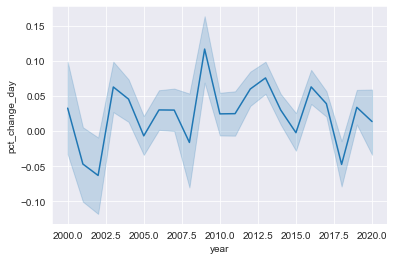

In [16]:
sns.set_style("darkgrid")
sns.lineplot(data=df, x="year", y="pct_change_day")

<AxesSubplot:xlabel='month', ylabel='pct_change_day'>

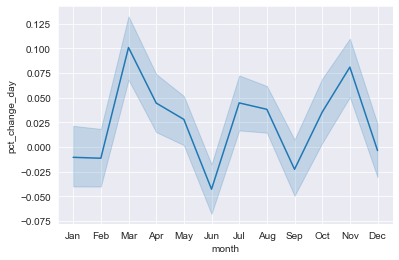

In [17]:
sns.lineplot(data=df, x="month", y="pct_change_day")

<AxesSubplot:xlabel='day_of_week', ylabel='pct_change_day'>

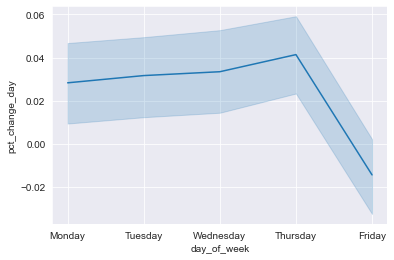

In [28]:
sns.lineplot(data=df, x="day_of_week", y="pct_change_day")